# Example 2 - ResNet's - 2015

![resnets](https://i.imgflip.com/2n3h87.jpg)

---

## LiveLossPlot - Plot the loss function live during training

https://github.com/stared/livelossplot

In [ ]:
%%capture pip_install

!pip install livelossplot
!pip install tqdm

## Load 2 decades of CNN Research with a single `pip install` - OMGoodness!

https://github.com/broadinstitute/keras-resnet

![resnets](https://i.imgflip.com/2n3mle.jpg)

In [4]:
%%capture 

!pip install keras_resnet

In [ ]:
import keras
import keras_resnet.models

In [ ]:
import os

import numpy as np
import pandas as pd

## Finding all Available Images in Data Folder

In [7]:
DATA_DIRECTORY_DOGS = "../CNN/data/dogs/"
DATA_DIRECTORY_CATS = "../CNN/data/cats/"

SAMPLE_SIZE = 10000

DOGS = os.listdir(DATA_DIRECTORY_DOGS)
CATS = os.listdir(DATA_DIRECTORY_CATS)

CATS_SAMPLE = np.random.choice( CATS, size=int(SAMPLE_SIZE/2), replace=False)
DOGS_SAMPLE = np.random.choice( DOGS, size=int(SAMPLE_SIZE/2), replace=False)

CATS_SAMPLE_FULLPATH = [DATA_DIRECTORY_CATS + file for file in CATS_SAMPLE]
DOGS_SAMPLE_FULLPATH = [DATA_DIRECTORY_DOGS + file for file in DOGS_SAMPLE]

ANIMALS = CATS_SAMPLE_FULLPATH + DOGS_SAMPLE_FULLPATH
np.random.shuffle(ANIMALS)

## Loading the Images as arrays

In [8]:
from tqdm import tnrange, tqdm_notebook, tqdm
from keras.preprocessing import image

images = []
labels = []

for animal_path in tqdm_notebook(ANIMALS,desc="Loading Images",unit="images"):
    img = image.load_img(animal_path, grayscale=False, color_mode="rgb", target_size=(50,50) )
    img_label = np.array([1,0])
    if "dog" in animal_path:
        img_label = np.array([0,1])
    try:
        images.append( image.img_to_array(img)/255 ) 
        labels.append(img_label)
    except:
        pass


In [14]:
import numpy as np

images_data=np.array(images)
class_labels=np.array(labels)

print(images_data.shape)

(10000, 50, 50, 3)


## Display first few training sample

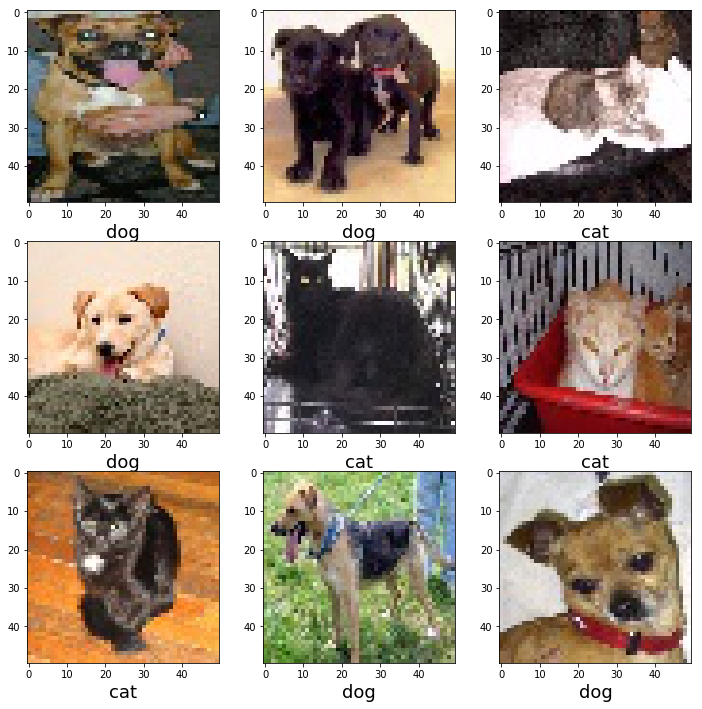

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))

random_labels = class_labels[:9]
random_images = images_data[:9]
random_labels_titles = [ "dog" if l[1] > 0 else "cat" for l in random_labels]

for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(random_images[i])
    plt.xlabel(random_labels_titles[i],fontsize=18)
plt.show()

## Re-use a  ResNet Design - `inputshape`, `classes`, and `complexity`!

https://github.com/broadinstitute/keras-resnet

- (?) Why would stacking blocks with `+` operator be beneficial? (Discussion, I don't have the answer)

In [19]:
import keras_resnet.blocks

shape, classes = (50, 50, 3), 2

x = keras.layers.Input(shape)

resnet_block = keras_resnet.blocks.basic_2d

model = keras_resnet.models.ResNet(x,blocks=[2,1],block=resnet_block, classes=classes, include_top=True)
model.compile("adam", "categorical_crossentropy", ["accuracy"])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 50, 50, 3)    0                                            
__________________________________________________________________________________________________
padding_conv1 (ZeroPadding2D)   (None, 56, 56, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 25, 25, 64)   9408        padding_conv1[0][0]              
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 25, 25, 64)   256         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu

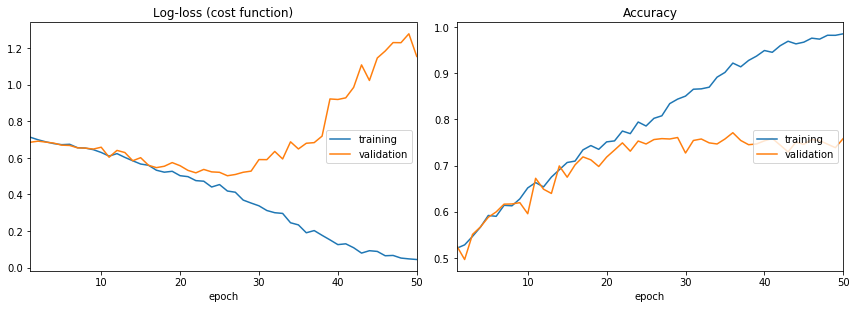

In [20]:
from livelossplot import PlotLossesKeras

model.fit(images_data,class_labels,validation_split=0.25,epochs=50,batch_size=150, callbacks=[PlotLossesKeras()],verbose=1)

## Uncomment lines to save/load a model

In [21]:
from keras.models import load_model

model.save("models/resnet.hdf5")

#model = load_model("models/resnet.hdf5")

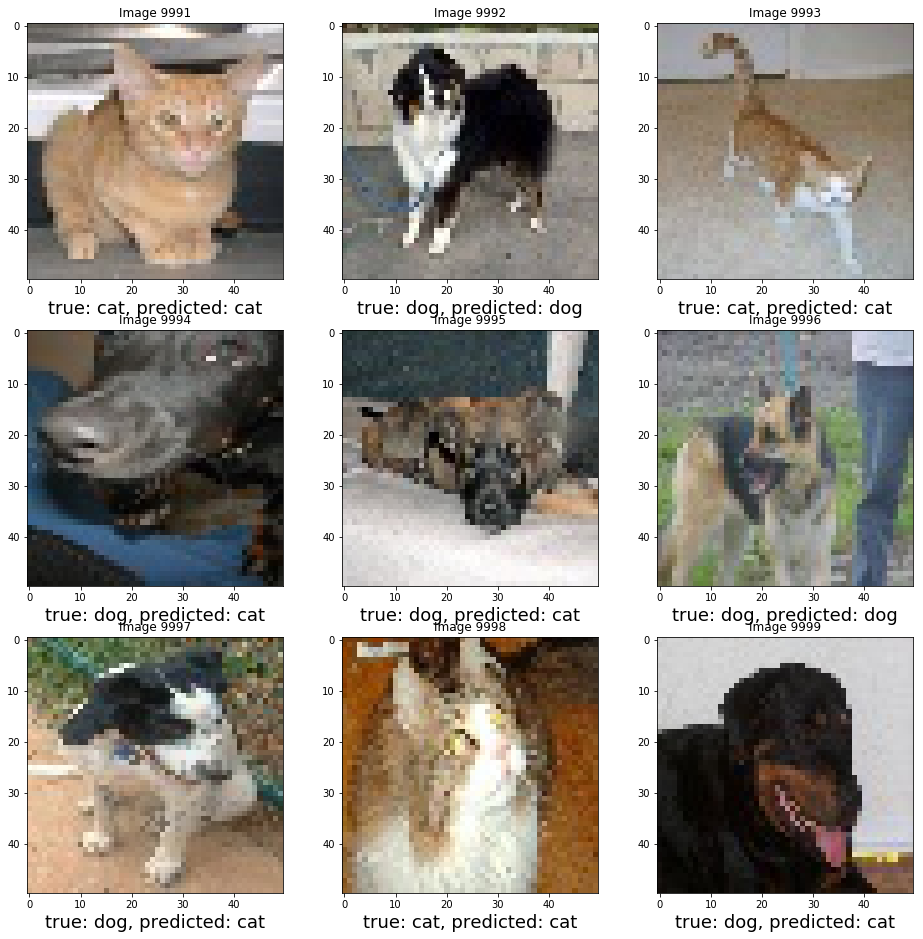

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(16,16))

tail_images = images_data[-9:]
tail_labels = class_labels[-9:]

predicted_labels = np.argmax(model.predict(tail_images),axis=1)

random_labels_titles = [ "true: dog" if l[1] > 0 else "true: cat" for l in tail_labels ]
predicted_labels = [ ", predicted: dog" if p > 0 else ", predicted: cat" for p in predicted_labels ]

new_labels = [ t + p for t,p in zip(random_labels_titles, predicted_labels)]

for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(tail_images[i])
    plt.xlabel(new_labels[i],fontsize=18)
    plt.title("Image {}".format(len(class_labels)-9+i))
plt.show()

## Experimental - Class Activation Heatmaps

In [25]:
%%capture
!pip install keras-vis

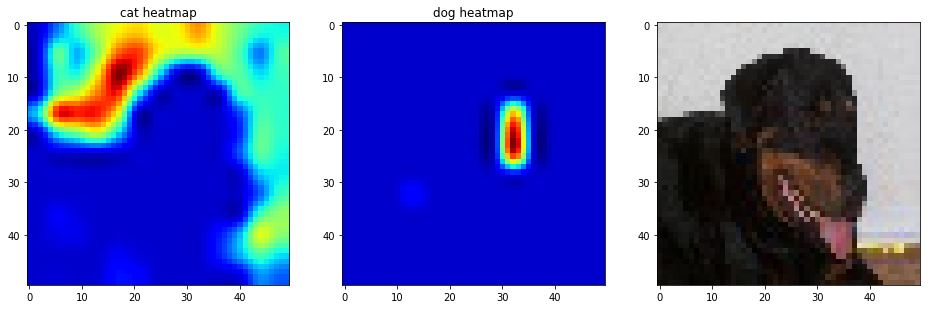

In [26]:
%matplotlib inline
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation

image_index = 9999

cat_activation_heatmap = visualize_cam(model, 9, filter_indices=[0], seed_input=images_data[image_index])
dog_activation_heatmap = visualize_cam(model, 9, filter_indices=[1], seed_input=images_data[image_index])

import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(cat_activation_heatmap, cmap='jet')
plt.title("cat heatmap")
plt.subplot(1,3,2)
plt.imshow(dog_activation_heatmap, cmap='jet')
plt.title("dog heatmap")
plt.subplot(1,3,3)
plt.imshow(images_data[image_index])